In [1]:
import math;
import numpy as np;
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import scipy.constants as scc

In [17]:
#number of surfaces
noOfParamPlanes = 10; # number of rectangles which make a cylinder
d = 400.0e-7; # diameter of cylinder
radius = d/2; # 200nm in cgs
a_period  = 500.0e-7; # period of array

w_Al = 4.0e-4; # size of aluminum pad
w_margin = 1.0e-4; # margin size of Al around the aluminum pad 

height = 145e-7; # this needs to be consistant with the input file. 145 nm in cgs
theta = 0.0;
delt = 2.0*math.pi/noOfParamPlanes; # 2*pi/# of rectangles

In [18]:
nx0_elem = 1; nx1_elem = 9; dnx_elem = 1 # starting cylinder element index n0; ending n1; interval dn
ny0_elem = 1; ny1_elem = 9; dny_elem = 1
a_positionx1 = a_period * (nx1_elem - 1) / 2 + w_Al/2 + w_margin; # 2um Al pad with 1um margin
a_positionx2 = - a_period * (nx1_elem - 1) / 2 - (w_Al/2 + w_margin); # 2um Al pad with 1um margin;

paramPlaneList = [];
originList = [];

In [19]:
# right array
for iteration_x in range (nx0_elem, nx1_elem, dnx_elem) : # count of cynlinders in x 
    offsetx = - a_period * nx1_elem / 2 + (iteration_x - 1) * a_period + a_positionx1;
    for iteration_y in range (ny0_elem, ny1_elem, dny_elem) :
        if (iteration_x%2) == 0:
            offsety = - a_period * ny1_elem / 2 + (iteration_y - 1) * a_period + a_period/2;
        else:
            offsety = - a_period * ny1_elem / 2 + (iteration_y - 1) * a_period;
        offsetz = 0; 
        offset = [offsetx,offsety,offsetz]; # in centimeter; in cgs; if wanted to switch to SI, change the value of k_B in input file
        print(iteration_x, iteration_y);
        print(offsetx,offsety);
        
        #making a cylinder out of 40 rectangles
        for ii in range(noOfParamPlanes):
            #define parametric surface
            x0=math.cos(ii*delt)*radius+offset[0]; # origin of vector
            y0=math.sin(ii*delt)*radius+offset[1];
            z0 = 0.0; 
            
            x1=math.cos((ii+1)*delt)*radius+offset[0];
            y1=math.sin((ii+1)*delt)*radius+offset[1];
            z1=0.0;
            
            #tangent and parameter 1
            # utop and vtop tell the span of these two vectors to form a plane
            uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2) # difference between x and y projections
            u=[x1-x0,y1-y0,z1-z0]/uTop; # normalize
            ux=u[0]; uy=u[1]; uz=u[2]; # vector tangential to cylinder surface and in the xy plane
            
            #tangent and parameter 2
            vx=0.0; vy=0.0; vz=1.0; # vector tangential to cylinder surface and in the z direction
            vTop = height;
            
            #surface normals
            xt=math.cos((ii+0.5)*delt)*radius+offset[0];
            yt=math.sin((ii+0.5)*delt)*radius+offset[1];
            zt=height/2;
            ln=[offset[0]-xt,offset[1]-yt,height/2-zt]/np.linalg.norm([offset[0]-xt,offset[1]-yt,height/2-zt],2);
            lnx=ln[0]; lny=ln[1]; lnz=ln[2];
            rnx=-lnx; rny=-lny; rnz=-lnz;
            # vector normal to the rectangle segment; right and left are pointing to different directions as of the surface
            # rn = [math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0]/np.linalg.norm([math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0],2);

            #porosity, specularity, temperature, momentum conservation (left and right)
            # porosity = 0: particles bounces back from surface; porosity = 1: particles completely go through the surface
            # specularity play the same role as alpha in the Nat. Comm. paper. specularity = 1: completely specular reflection. specularity = 0: completely diffusive reflection
            # temperature: plugged into the Boltzman-Einstein distribution for random particle velocity
            # momentum conservation: for gas only, not used in phonon case, just keep them 1.0
            pl=0.0; sl=1.0; tl=4.0;cl=1.0;
            pr=0.0; sr=1.0; tr=4.0;cr=1.0;
            
            #periodic
            p=0.0;
            
            # since the cylinder segments are not source, these are set to be ineffective
            # 2 species of particles for now; can change freely
            #density if a source, for each species (left and right)
            nr0=0.0; nr1=0.0;nl0=0.0;nl1=0.0;
            #source
            sourcer=0.0;sourcel=0.0;
            #area (only used if a source)
            a=0.0;
            #sink
            sinkl=0.0;
            sinkr=0.0;
            
            #code expects it in this order:
            paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];
            paramPlaneList.append(paramPlane);
            
print("array = ",np.shape(paramPlaneList))
print("element = ",np.shape(paramPlane))

1 1
0.00027499999999999996 -0.00022500000000000002
1 2
0.00027499999999999996 -0.00017500000000000003
1 3
0.00027499999999999996 -0.000125
1 4
0.00027499999999999996 -7.500000000000001e-05
1 5
0.00027499999999999996 -2.500000000000001e-05
1 6
0.00027499999999999996 2.4999999999999984e-05
1 7
0.00027499999999999996 7.500000000000001e-05
1 8
0.00027499999999999996 0.00012499999999999998
2 1
0.000325 -0.0002
2 2
0.000325 -0.00015000000000000001
2 3
0.000325 -0.0001
2 4
0.000325 -5.000000000000001e-05
2 5
0.000325 -1.0164395367051604e-20
2 6
0.000325 4.999999999999998e-05
2 7
0.000325 0.0001
2 8
0.000325 0.00015
3 1
0.000375 -0.00022500000000000002
3 2
0.000375 -0.00017500000000000003
3 3
0.000375 -0.000125
3 4
0.000375 -7.500000000000001e-05
3 5
0.000375 -2.500000000000001e-05
3 6
0.000375 2.4999999999999984e-05
3 7
0.000375 7.500000000000001e-05
3 8
0.000375 0.00012499999999999998
4 1
0.00042500000000000003 -0.0002
4 2
0.00042500000000000003 -0.00015000000000000001
4 3
0.0004250000000000

In [20]:
# left array
for iteration_x in range (nx0_elem, nx1_elem, dnx_elem) : # count of cynlinders in x 
    offsetx = - a_period * nx1_elem / 2 + (iteration_x - 1) * a_period + a_positionx2;
    for iteration_y in range (ny0_elem, ny1_elem, dny_elem) :
        if (iteration_x%2) == 0:
            offsety = - a_period * ny1_elem / 2 + (iteration_y - 1) * a_period;
        else:
            offsety = - a_period * ny1_elem / 2 + (iteration_y - 1) * a_period + a_period/2;
        offsetz = 0; 
        offset = [offsetx,offsety,offsetz]; # in centimeter; in cgs; if wanted to switch to SI, change the value of k_B in input file
        print(iteration_x, iteration_y);
        print(offsetx,offsety);
        
        #making a cylinder out of 40 rectangles
        for ii in range(noOfParamPlanes):
            #define parametric surface
            x0=math.cos(ii*delt)*radius+offset[0]; # origin of vector
            y0=math.sin(ii*delt)*radius+offset[1];
            z0 = 0.0; 
            
            x1=math.cos((ii+1)*delt)*radius+offset[0];
            y1=math.sin((ii+1)*delt)*radius+offset[1];
            z1=0.0;
            
            #tangent and parameter 1
            # utop and vtop tell the span of these two vectors to form a plane
            uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2) # difference between x and y projections
            u=[x1-x0,y1-y0,z1-z0]/uTop; # normalize
            ux=u[0]; uy=u[1]; uz=u[2]; # vector tangential to cylinder surface and in the xy plane
            
            #tangent and parameter 2
            vx=0.0; vy=0.0; vz=1.0; # vector tangential to cylinder surface and in the z direction
            vTop = height;
            
            #surface normals
            xt=math.cos((ii+0.5)*delt)*radius+offset[0];
            yt=math.sin((ii+0.5)*delt)*radius+offset[1];
            zt=height/2;
            ln=[offset[0]-xt,offset[1]-yt,height/2-zt]/np.linalg.norm([offset[0]-xt,offset[1]-yt,height/2-zt],2);
            lnx=ln[0]; lny=ln[1]; lnz=ln[2];
            rnx=-lnx; rny=-lny; rnz=-lnz;
            # vector normal to the rectangle segment; right and left are pointing to different directions as of the surface
            # rn = [math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0]/np.linalg.norm([math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0],2);

            #porosity, specularity, temperature, momentum conservation (left and right)
            # porosity = 0: particles bounces back from surface; porosity = 1: particles completely go through the surface
            # specularity play the same role as alpha in the Nat. Comm. paper. specularity = 1: completely specular reflection. specularity = 0: completely diffusive reflection
            # temperature: plugged into the Boltzman-Einstein distribution for random particle velocity
            # momentum conservation: for gas only, not used in phonon case, just keep them 1.0
            pl=0.0; sl=1.0; tl=4.0;cl=1.0;
            pr=0.0; sr=1.0; tr=4.0;cr=1.0;
            
            #periodic
            p=0.0;
            
            # since the cylinder segments are not source, these are set to be ineffective
            # 2 species of particles for now; can change freely
            #density if a source, for each species (left and right)
            nr0=0.0; nr1=0.0;nl0=0.0;nl1=0.0;
            #source
            sourcer=0.0;sourcel=0.0;
            #area (only used if a source)
            a=0.0;
            #sink
            sinkl=0.0;
            sinkr=0.0;
            
            #code expects it in this order:
            paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];
            paramPlaneList.append(paramPlane);

1 1
-0.0007250000000000001 -0.0002
1 2
-0.0007250000000000001 -0.00015000000000000001
1 3
-0.0007250000000000001 -0.0001
1 4
-0.0007250000000000001 -5.000000000000001e-05
1 5
-0.0007250000000000001 -1.0164395367051604e-20
1 6
-0.0007250000000000001 4.999999999999998e-05
1 7
-0.0007250000000000001 0.0001
1 8
-0.0007250000000000001 0.00015
2 1
-0.000675 -0.00022500000000000002
2 2
-0.000675 -0.00017500000000000003
2 3
-0.000675 -0.000125
2 4
-0.000675 -7.500000000000001e-05
2 5
-0.000675 -2.500000000000001e-05
2 6
-0.000675 2.4999999999999984e-05
2 7
-0.000675 7.500000000000001e-05
2 8
-0.000675 0.00012499999999999998
3 1
-0.000625 -0.0002
3 2
-0.000625 -0.00015000000000000001
3 3
-0.000625 -0.0001
3 4
-0.000625 -5.000000000000001e-05
3 5
-0.000625 -1.0164395367051604e-20
3 6
-0.000625 4.999999999999998e-05
3 7
-0.000625 0.0001
3 8
-0.000625 0.00015
4 1
-0.000575 -0.00022500000000000002
4 2
-0.000575 -0.00017500000000000003
4 3
-0.000575 -0.000125
4 4
-0.000575 -7.500000000000001e-05
4 5

In [21]:
#rectangle to act as source:

x0= -w_Al/2; # -2um as in the paper, in cm unit
y0= -w_Al/2;
z0 = height - 0.0000000001; 

x1= w_Al/2;
y1= -w_Al/2;
z1= height - 0.0000000001; 

x2= -w_Al/2;
y2= w_Al/2;
z2= height - 0.0000000001; 

#tangent and parameter 1
uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2)
u=[x1-x0,y1-y0,z1-z0]/uTop;
ux=u[0]; uy=u[1]; uz=u[2];

#tangent and parameter 2
vTop = np.linalg.norm([x2-x0,y2-y0,z2-z0],2)
v=[x2-x0,y2-y0,z2-z0]/vTop;
vx=v[0]; vy=v[1]; vz=u[2];

#surface normals

ln=[0.0,0.0,-1.0];
lnx=ln[0]; lny=ln[1]; lnz=ln[2]; # left is defined to point into the domain with this setup
rnx=-lnx; rny=-lny; rnz=-lnz;

#porosity, specularity, temperature, momentum conservation (left and right)
pl=0.0; sl=1.0; tl=4.0;cl=1.0;
pr=0.0; sr=1.0; tr=4.0;cr=1.0;

#periodic
p=0.0;

#density if a source, for each species (left and right)
nr0=0.0; nr1=0.0;nl0=0.0;nl1=5.0e15;
#source
sourcer=0.0;sourcel=1.0; 
#area (only used if a source)
a=w_Al*w_Al;
#sink
sinkl=0.0;
sinkr=0.0;

#code expects it in this order:
paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];

paramPlaneList.append(paramPlane);

# particles dissapear when hitting a sink
#rectangle to act as sink:

x0= -w_Al/2;
y0= -w_Al/2;
z0 = 0.0000000001; 

x1= w_Al/2;
y1= -w_Al/2;
z1= 0.0000000001; 

x2= -w_Al/2;
y2= w_Al/2;
z2= 0.0000000001; 

#tangent and parameter 1
uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2)
u=[x1-x0,y1-y0,z1-z0]/uTop;
ux=u[0]; uy=u[1]; uz=u[2];

#tangent and parameter 2
vTop = np.linalg.norm([x2-x0,y2-y0,z2-z0],2)
v=[x2-x0,y2-y0,z2-z0]/vTop;
vx=v[0]; vy=v[1]; vz=u[2];

#surface normals

ln=[0.0,0.0,-1.0];
lnx=ln[0]; lny=ln[1]; lnz=ln[2];
rnx=-lnx; rny=-lny; rnz=-lnz;

#porosity, specularity, temperature, momentum conservation (left and right)
pl=0.0; sl=1.0; tl=4.0;cl=1.0;
pr=0.0; sr=1.0; tr=4.0;cr=1.0;

#periodic
p=0.0;

#density if a source, for each species (left and right)
nr0=0.0; nr1=0.0;nl0=0.0;nl1=0.0;
#source
sourcer=0.0;sourcel=0.0;
#area (only used if a source)
a=w_Al*w_Al;
#sink
sinkl=0.0;
sinkr=1.0;

#code expects it in this order:
paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];

paramPlaneList.append(paramPlane);


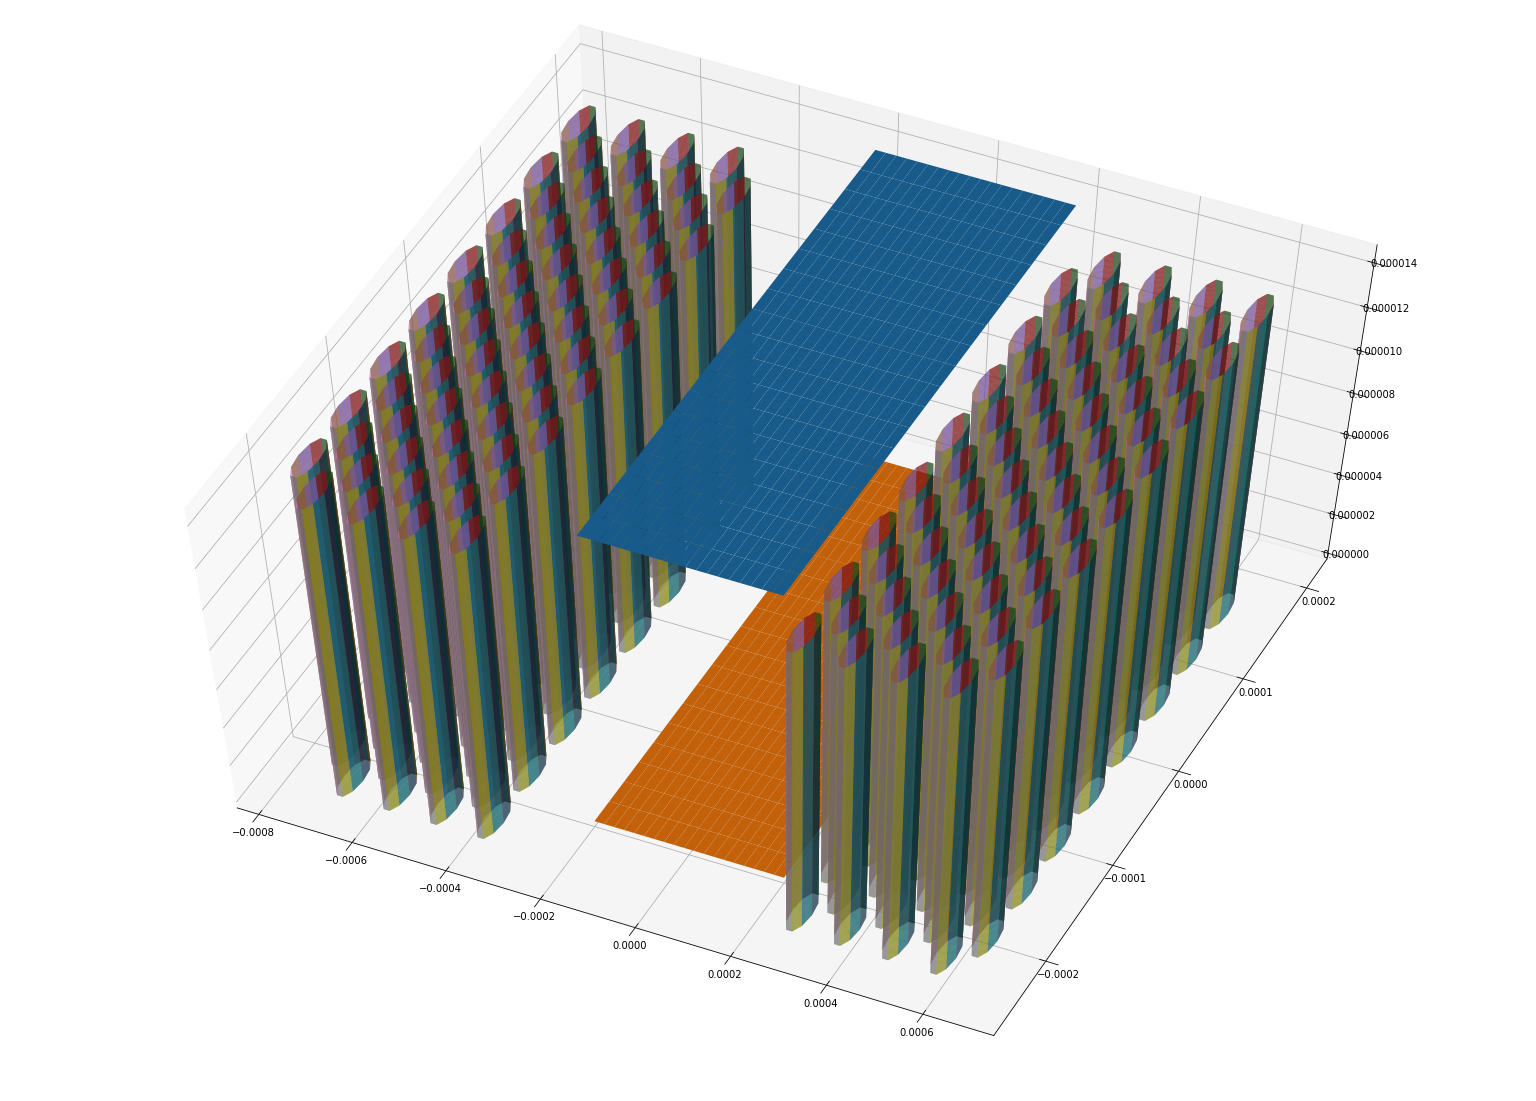

In [22]:
#Plot surfaces

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 20

fig = plt.figure();
fig.set_size_inches(60, 20)
ax = fig.add_subplot(121, projection='3d');
#ax.set_zlim(0,0.012);
#ax.set_xlim(0,0.08);
#ax.set_ylim(0,0.08);
#ax.view_init(36, 26);

totalPlanes = len(paramPlaneList);

for ii in range(totalPlanes):
    u = np.linspace(0, paramPlaneList[ii][9], n) # utop, norm of section length
    v = np.linspace(0, paramPlaneList[ii][10], n) # vtop
    u, v = np.meshgrid(u, v)

    x = paramPlaneList[ii][0] + paramPlaneList[ii][3]*u + paramPlaneList[ii][6]*v; # x0, ux, vx
    y = paramPlaneList[ii][1] + paramPlaneList[ii][4]*u + paramPlaneList[ii][7]*v; # y0, uy, vy
    z = paramPlaneList[ii][2] + paramPlaneList[ii][5]*u + paramPlaneList[ii][8]*v; # z0, uz, vz
    
    surf = ax.plot_surface(x,y,z)

ax.view_init(60, -65)
plt.show()


In [23]:
#write surfaces to file
import os
if os.path.isfile("paramplanes.dat"):
    os.remove("paramplanes.dat");

totalPlanes = len(paramPlaneList);

f = open('paramplanes.dat','a');
f.write('{}'.format(totalPlanes));
f.write('\n');

kk=0;

for ii in range(totalPlanes):
    totalElements = len(paramPlaneList[ii])
    for jj in range(totalElements):
        kk = kk+1;
        f.write('{}'.format(paramPlaneList[ii][jj]));
        f.write('\n');
        
f.close()

In [24]:
#generate particles. The number of particles here must be consistent with the input file
n=100;
particleList = [];
for ii in range(n):
    coords = [0,0,140e-7];
    particleList.append(coords);   

In [25]:
#write particles to file

import os
if os.path.isfile("particles.dat"):
    os.remove("particles.dat");

totalParticles = len(particleList);

f = open('particles.dat','a');

for ii in range(totalParticles):
    
    f.write('{}'.format(particleList[ii][0]));
    f.write('\t');
    f.write('{}'.format(particleList[ii][1]));
    f.write('\t');
    f.write('{}'.format(particleList[ii][2]));
    f.write('\n');
        
f.close()